In [78]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

# To get nicer plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') # Output as svg. Else you can try png
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
np.set_printoptions(precision=3);

C:\Users\Felix\AppData\Local\Temp\ipykernel_9316\3432016972.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg') # Output as svg. Else you can try png


# 2.1 Problem 1.1 using matrix multiplications
Implement the linear regression problems from Exercises 1.1(a), (b), (c), (d) and (e) in Python using matrix multiplications.
A matrix
$$
\textbf{X} =  \begin{bmatrix}
    1 & 2 \\
    1 & 3 \\ 
\end{bmatrix}
$$
can be constructed with numpy as `X=np.array([[1, 2], [1, 3]])` (Make sure that `numpy` has been imported. Here it is imported as `np`). The commands for matrix multiplication and transpose in `numpy` are `@` or `np.matmul` and `.T` or `np.transpose()` respectively. A system of linear equations $\textbf{A}x=\textbf{b}$ can be solved using `np.linalg.solve(A,b)`.  A $k \times k$ unit matrix can be constructed with `np.eye(k)`.


## (a) <a id='2.1-a'></a>
Assume that you record a scalar input $x$ and a scalar output $y$. First, you record $x_1 = 2, y_1 = -1$, and thereafter $x_2 = 3, y_2 = 1$. Assume a linear regression model $y = \theta_0 + \theta_1 x + \epsilon$ and learn the parameters with maximum likelihood $\widehat{\boldsymbol{\theta}}$ with the assumption $\epsilon \sim \mathcal{N}(0,\sigma_\epsilon^2)$. Use the model to predict the output for the test input $x_\star = 4$, and plot the data and the model.

[-1.  1.]
[-5.  2.]
theta_hat = [-5.  2.]
y_hat = [-1.  1.]
[-1.  1.]


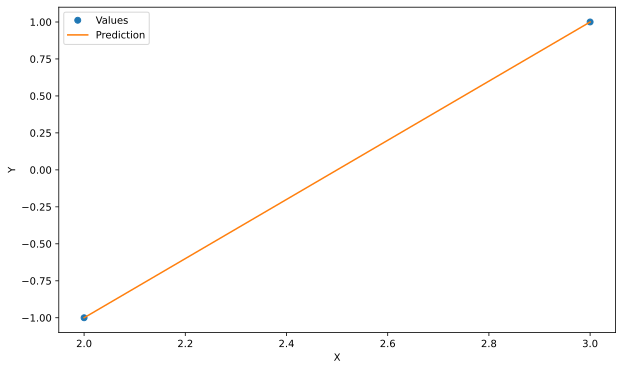

In [79]:
#We get XtXO = XtY and we want to solve for O 
#A solution would be ô = (XtX)^-1(XtY)

X =np.array([[1,2],[1,3]])
Xt = X.transpose()
Y = np.array([-1,1])


theta_hat = np.linalg.inv((Xt@X))@(Xt@Y)

Y_hat = X@theta_hat

print(Y_hat)
print(theta_hat)

"""
plt.plot(X[:,1],Y,'o',label="data")
plt.plot(X[:,1],Y_hat, Label="prediction")
"""


#theta_hat = np.linalg.solve(X.T@X, X.T@Y) 
print (f"theta_hat = {theta_hat}") 
#y_hat = theta_hat@np.array([1,4]) 
print (f"y_hat = {Y_hat}") 
prediction = X@theta_hat 
print(prediction)

plt.plot(X[:,1],Y, 'o',label='Values')
plt.plot(X[:,1],Y_hat,label='Prediction')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



## (b) <a id='2.1-b'></a>

Now, assume you have made a third observation $y_3 = 2$ for $x_3 = 4$ (is that what you predicted in [(a)](#2.1-a)?). Update the parameters $\widehat{\boldsymbol{\theta}}$ to all 3 data samples, add the new model to the plot (together with the new data point) and find the prediction for $x_\star = 5$.

calculated module = [-0.833  0.667  2.167]
theta_hat=[-3.833  1.5  ]


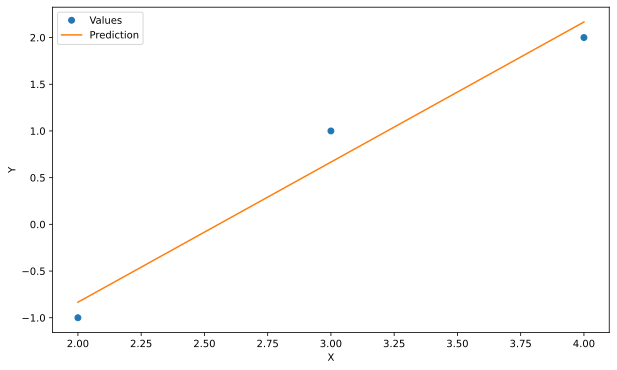

In [80]:
#We get XtXO = XtY and we want to solve for O 
#A solution would be ô = (XtX)^-1(XtY)

X =np.array([[1,2],[1,3],[1,4]])
Xt = X.transpose()
Y = np.array([-1,1,2])


theta_hat = np.linalg.inv((Xt@X))@(Xt@Y)
#theta_hat = np.linalg.solve(X.T@X, X.T@Y) 

calculated_module = X@theta_hat

print(f"calculated module = {calculated_module}")
print(f"theta_hat={theta_hat}")


#y_hat = theta_hat@np.array([1,4]) 

plt.plot(X[:,1],Y, 'o',label='Values')
plt.plot(X[:,1],calculated_module,label='Prediction')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## (c) <a id='2.1-c'></a>
Repeat [(b)](#2.1-b), but this time using a model without intercept term, i.e., $y = \theta_1x + \epsilon$.

calculated module = [0.621 0.931 1.241]
theta_hat=[0.31]


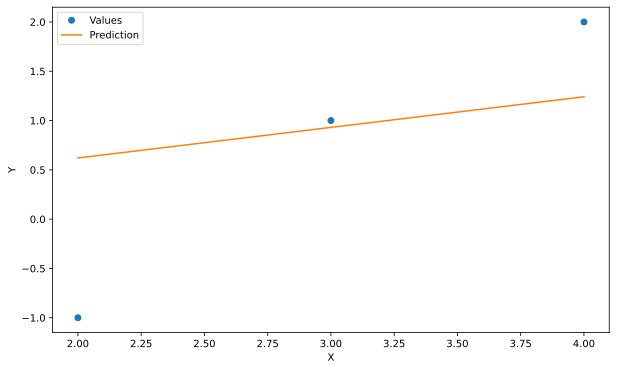

In [81]:
#We get XtXO = XtY and we want to solve for O 
#A solution would be ô = (XtX)^-1(XtY)

X =np.array([[2],[3],[4]])
Xt = X.transpose()
Y = np.array([-1,1,2])


theta_hat = np.linalg.inv((Xt@X))@(Xt@Y)
#theta_hat = np.linalg.solve(X.T@X, X.T@Y) 

calculated_module = X@theta_hat

print(f"calculated module = {calculated_module}")
print(f"theta_hat={theta_hat}")


#y_hat = theta_hat@np.array([1,4]) 

plt.plot(X,Y, 'o',label='Values')
plt.plot(X,calculated_module,label='Prediction')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## (d) <a id='2.1-d'></a>
Repeat [(b)](#2.1-b), but this time using Ridge Regression with $\gamma=1$ instead.

[[ 3  9]
 [ 9 29]]
calculated module = [-0.833  0.667  2.167]
theta_hat=[-3.833  1.5  ]

calculated module with ridge:1 = [0.385 0.846 1.308]
theta_hat with ridge=[-0.538  0.462]


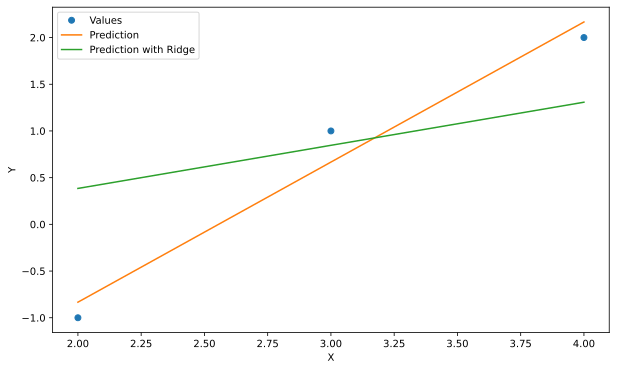

In [82]:
#We get (X.T@XT+gamma@I)@theta = X.T@Y and we want to solve for theta
#A solution would be theta_hat = (X.T@X+gamma@I)^-1@(X.T@Y)

X =np.array([[1,2],[1,3],[1,4]])
Y = np.array([-1,1,2])
Gamma = 1*np.identity(2)

print(X.T@X)

theta_hat_ridge = np.linalg.inv((X.T@X+Gamma))@(X.T@Y)
theta_hat = np.linalg.solve(X.T@X, X.T@Y) 

calculated_model = X@theta_hat
calculated_model_ridge = X@theta_hat_ridge

print(f"calculated module = {calculated_model}")
print(f"theta_hat={theta_hat}")
print("")
print(f"calculated module with ridge:1 = {calculated_model_ridge}")
print(f"theta_hat with ridge={theta_hat_ridge}")

#y_hat = theta_hat@np.array([1,4]) 

plt.plot(X[:,1],Y, 'o',label='Values')
plt.plot(X[:,1],calculated_model,label='Prediction')
plt.plot(X[:,1],calculated_model_ridge,label='Prediction with Ridge')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## (e) <a id='(e)'></a>
You realize that there are actually _two_ output variables in the problem you are studying. In total, you have made the following observations:

| sample | input $x$ | first output $y_1$ | second output $y_2$ |
|:------:|:---------:|:------------------:|:-------------------:|
| (1)    | 2         | -1                 | 0                   |
| (2)    | 3         | 1                  | 2                   |
| (3)    | 4         | 2                  | -1                  |

You want to model this as a linear regression with multidimensional outputs (without regularization), i.e.,
$$\begin{align}
    y_1 &= \theta_{01}+\theta_{11}x + \epsilon_1\\
    y_2 &= \theta_{02}+\theta_{12}x + \epsilon_2
\end{align}$$
By introducing, for the general case of $p$ inputs and $q$ outputs, the matrices
$$\begin{align}
    \underbrace{\begin{bmatrix}
        y_{11} & \cdots & y_{1q} \\
        y_{21} & \cdots & y_{2q} \\
        \vdots & & \vdots \\
        y_{n1} & \cdots & y_{nq}
    \end{bmatrix}}_{\boldsymbol{\mathrm{Y}}}
    &=
    \underbrace{\begin{bmatrix}
        1 & x_{11} & x_{12} & \cdots & x_{1p} \\
        1 & x_{21} & x_{22} & \cdots & x_{2p} \\
        \vdots     & \vdots & \vdots & \vdots \\
        1 & x_{n1} & x_{n2} & \cdots & x_{np} \\
    \end{bmatrix}}_{\boldsymbol{\mathrm{X}}}
    \underbrace{\begin{bmatrix}
        \theta_{01} & \theta_{02} & \cdots & \theta_{0q} \\
        \theta_{11} & \theta_{12} & \cdots & \theta_{1q} \\
        \theta_{21} & \theta_{22} & \cdots & \theta_{2q} \\
        \vdots      & \vdots      &        & \vdots      \\
        \theta_{p1} & \theta_{p2} & \cdots & \theta_{pq}
    \end{bmatrix}}_{\boldsymbol{\mathrm{\Theta}}} + \boldsymbol{\epsilon}
\end{align}$$

try to make an educated guess how the normal equations can be generalized to the multidemsional output case. (A more thorough derivation is found in problem 1.5). Use your findings to compute the least square solution $\widehat{\boldsymbol{\mathrm{\Theta}}}$ to the problem now including both the first output $y_1$ and the second output $y_2$.

X matrix = [[1 2]
 [1 3]
 [1 4]]
Y matrix = [[-1  0]
 [ 1  2]
 [ 2 -1]]
X.T@X = [[ 3  9]
 [ 9 29]]
calculated module = [[-0.833  0.833]
 [ 0.667  0.333]
 [ 2.167 -0.167]]
theta_hat=[[-3.833  1.833]
 [ 1.5   -0.5  ]]


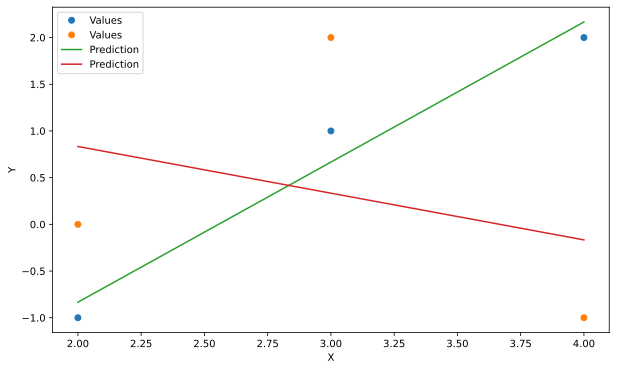

In [83]:
#We get (X.T@XT)@theta = X.T@Y and we want to solve for theta
#A solution would be theta_hat = (X.T@X)^-1@(X.T@Y)

X =np.array([[1,2],[1,3],[1,4]])
Y = np.array([[-1,0],[1,2],[2,-1]])
print(f"X matrix = {X}")
print(f"Y matrix = {Y}")



print(f"X.T@X = {X.T@X}")

theta_hat_ridge = np.linalg.inv((X.T@X+Gamma))@(X.T@Y)
theta_hat = np.linalg.solve(X.T@X, X.T@Y) 

calculated_model = X@theta_hat
calculated_model_ridge = X@theta_hat_ridge

print(f"calculated module = {calculated_model}")
print(f"theta_hat={theta_hat}")

#y_hat = theta_hat@np.array([1,4]) 

plt.plot(X[:,1],Y, 'o',label='Values')
plt.plot(X[:,1],calculated_model,label='Prediction')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 2.2 Problem 1.1 using the linear_model.LinearRegression() command
Implement the linear regression problem from Exercises 1.1(b) and (c) using the command `LinearRegression()` from `sklearn.linear_model`. 

## (b)
[See above.](#2.1-b)

this is the coeficient for X : 1.500
Intercept : -3.833 


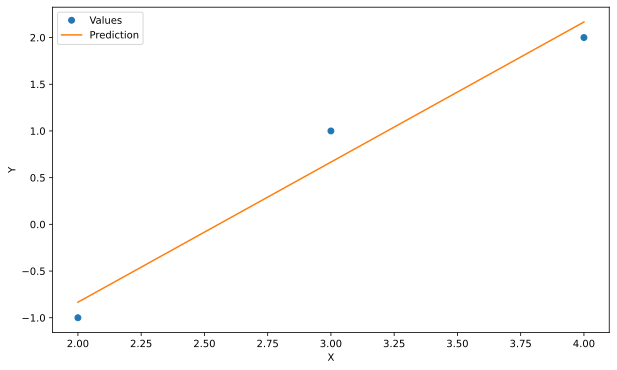

In [84]:
#We get (X.T@XT)@theta = X.T@Y and we want to solve for theta
#A solution would be theta_hat = (X.T@X)^-1@(X.T@Y)

#X =np.array([[1,2],[1,3],[1,4]])
X =np.array([2,3,4]).reshape(-1,1)
Y = np.array([-1,1,2])

model = skl_lm.LinearRegression()

model.fit(X,Y)

print(f"this is the coeficient for X : {model.coef_[0]:.3f}")
print(f"Intercept : {model.intercept_:.3f} ")

plt.plot(X,Y, 'o',label='Values')
prediction = model.predict(X)
plt.plot(X,prediction,label='Prediction')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## (c)
[See above.](#2.1-c)

this is the coeficient for X : 0.310
Intercept : 0.000 


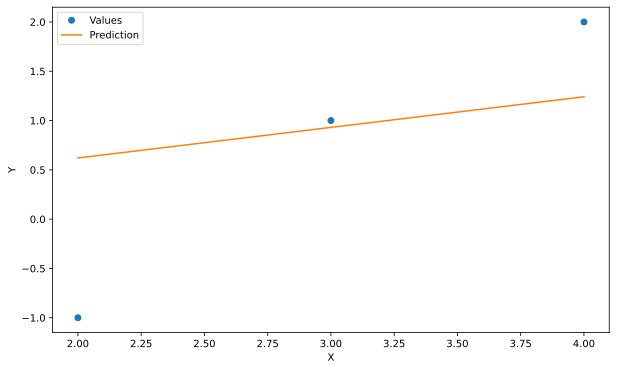

In [85]:
#We get (X.T@XT)@theta = X.T@Y and we want to solve for theta
#A solution would be theta_hat = (X.T@X)^-1@(X.T@Y)

#X =np.array([[1,2],[1,3],[1,4]])
X =np.array([2,3,4]).reshape(-1,1)
Y = np.array([-1,1,2])

model = skl_lm.LinearRegression(fit_intercept=False)

model.fit(X,Y)

print(f"this is the coeficient for X : {model.coef_[0]:.3f}")
print(f"Intercept : {model.intercept_:.3f} ")

plt.plot(X,Y, 'o',label='Values')
prediction = model.predict(X)
plt.plot(X,prediction,label='Prediction')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 2.3 The Auto data set

## (a)
Load the dataset `'data/auto.csv'`. Familiarize yourself with the dataset using `auto.info()`. The dataset:  

**Description**:  Gas mileage, horsepower, and other information for 392 vehicles.  
**Format**: A data frame with 392 observations on the following 9 variables.  

- `mpg`: miles per gallon  
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement (cu. inches)
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight (lbs.)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year (modulo 100)
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name  
*The orginal data contained 408 observations but 16 observations with missing values were removed.*


In [86]:
# Load library
# The null values are '?' in the dataset. `na_values="?"` recognize the null values. 
# There are null values that will mess up the computation. Easier to drop them by `dropna()`.

# url = 'data/auto.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/auto.csv'

auto = pd.read_csv(url, na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## (b)
Divide the data set randomly into two approximately equally sized subsets, `train` and `test` by generating the random indices using `np.random.choice()`.


In [87]:
print(auto.shape)
np.random.seed(1)

#Choosing 200 random row numbers from 0-auto.shape[0]
train_rows = np.random.choice(auto.shape[0], size=200, replace=False)

#Creating a bool array where True means that that row is in training data
train_index = auto.index.isin(train_rows)

auto_train_set = auto.iloc[train_index]

auto_test_set = auto.iloc[~train_index]



(392, 9)


## (c)
Perform linear regression with `mpg` as the output and all other variables except name as input. How well (in terms of root-mean-square-error) does the model perform on test data and training data, respectively?


In [88]:
auto_input_column_name = list(auto.columns.values)

auto_input_column_name.remove('mpg')
auto_input_column_name.remove('name')


Y = auto_train_set["mpg"]
X = auto_train_set[auto_input_column_name]

Y_test = auto_test_set["mpg"]
X_test = auto_test_set[auto_input_column_name]

model = skl_lm.LinearRegression(fit_intercept=True)

model.fit(X,Y)
print(model)

Y_train_predict = model.predict(X)

Y_test_predict = model.predict(X_test)

cost_train = np.sqrt(np.mean((Y-Y_train_predict)**2))
print(f"cost for training data is: {cost_train:.3f}")

cost_test = np.sqrt(np.mean((Y_test-Y_test_predict)**2))
print(f"cost for testing data is: {cost_test:.3f}")



LinearRegression()
cost for training data is: 3.282
cost for testing data is: 3.337


## (d)
Now, consider the input variable `origin`. What do the different numbers represent? By running `auto.origin.sample(30)` we see the 30 samples of the variable and that the input variables is quantitative. Does it really makes sense to treat it as a quantitative input? Use `pd.get_dummies()` to split it into dummy variables and do the linear regression again.


In [89]:
#The origin column specifies from what part of the world the car is from

"""
auto_input_column_name = list(auto.columns.values)

auto_input_column_name.remove('mpg')
auto_input_column_name.remove('name')

Y = auto_train_set["mpg"]
X = auto_train_set[auto_input_column_name]

Y_test = auto_test_set["mpg"]
X_test = auto_test_set[auto_input_column_name]
"""

X.info()

X = pd.get_dummies(X, columns=["origin"])
X_test= pd.get_dummies(X_test, columns=["origin"])


model = skl_lm.LinearRegression(fit_intercept=True)

model.fit(X, Y)
print(model)

Y_train_predict = model.predict(X)

Y_test_predict = model.predict(X_test)

cost_train = np.sqrt(np.mean((Y-Y_train_predict)**2))
print(f"cost for training data is: {cost_train:.3f}")

cost_test = np.sqrt(np.mean((Y_test-Y_test_predict)**2))
print(f"cost for testing data is: {cost_test:.3f}")

X_test


<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     198 non-null    int64  
 1   displacement  198 non-null    float64
 2   horsepower    198 non-null    float64
 3   weight        198 non-null    int64  
 4   acceleration  198 non-null    float64
 5   year          198 non-null    int64  
 6   origin        198 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 12.4 KB
LinearRegression()
cost for training data is: 3.263
cost for testing data is: 3.311


,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
7,8,440.0,215.0,4312,8.5,70,1,0,0
10,8,383.0,170.0,3563,10.0,70,1,0,0
...,...,...,...,...,...,...,...,...,...
392,4,140.0,86.0,2790,15.6,82,1,0,0
393,4,97.0,52.0,2130,24.6,82,0,1,0
394,4,135.0,84.0,2295,11.6,82,1,0,0
395,4,120.0,79.0,2625,18.6,82,1,0,0


## (e)
Try obtain a better RMSE on test data by removing some inputs (explore what happens if you remove, e.g, `year`, `weight` and `acceleration`)

In [90]:
def get_RMSE(model, X,Y):
    """
    Function that calculates the RMSE (root mean square error) between matrix/vector X and Y
    """
   
    Y_hat = model.predict(X)
    
    calculated_RMSE = np.sqrt(np.mean((Y-Y_hat)**2))
        
    return calculated_RMSE


def print_RMSE_without_inputs(model,X_train,Y_train,X_test,Y_test,imputs_to_drop):
  
    X_train = X_train.drop(columns=imputs_to_drop)
    X_test = X_test.drop(columns=imputs_to_drop)

    model.fit(X_train,Y_train)
    Y_train_hat = model.predict(X_train)
    
    print(f"This is RMSE with removed column(s):{imputs_to_drop}")
    RMSE = get_RMSE(model,X_train,Y_train)
    print(f"\tTRAIN data: {RMSE:.4f}")
    RMSE = get_RMSE(model,X_test,Y_test)
    print(f"\tTEST data: {RMSE:.4f}")      

In [91]:
"""
auto_input_column_name = list(auto.columns.values)

auto_input_column_name.remove('mpg')
auto_input_column_name.remove('name')

Y = auto_train_set["mpg"]
X = auto_train_set[auto_input_column_name]

X.info()

print(auto_input_column_name)

Y_test = auto_test_set["mpg"]
X_test = auto_test_set[auto_input_column_name]
"""
model = skl_lm.LinearRegression(fit_intercept=True)
inputs_to_remove = ["year","weight", "acceleration"]

for input in inputs_to_remove:
    print_RMSE_without_inputs(model,X,Y,X_test,Y_test,[input])
    

This is RMSE with removed column(s):['year']
	TRAIN data: 4.1714
	TEST data: 4.0975
This is RMSE with removed column(s):['weight']
	TRAIN data: 3.6699
	TEST data: 3.7471
This is RMSE with removed column(s):['acceleration']
	TRAIN data: 3.2650
	TEST data: 3.3122


## (f)
Try to obtain a better RMSE on test data by adding some transformations of inputs, such as 
$log(x)$, $\sqrt{x}$, $x_1x_2$ etc.


In [92]:
def print_RMSE_with_columns(model, X,Y,columns):
    X = X[columns]
    model.fit(X,Y)
    Y_hat = model.predict(X)
    
    calculated_RMSE = np.sqrt(np.mean((Y-Y_hat)**2))
        
    print(f"This is RMSE with columns:{columns}")
    RMSE = get_RMSE(model,X,Y)
    print(f"\tData: {RMSE:.4f}")


#Displacement squared
X_copy = X.copy()
X_test_copy = X_test.copy()
X_copy['displacement_sqared']=X_copy['displacement']**2

columns = ['cylinders','displacement','origin_1','origin_2','origin_3','acceleration','horsepower','displacement_sqared']

print_RMSE_with_columns(model,X_copy,Y, columns)


This is RMSE with columns:['cylinders', 'displacement', 'origin_1', 'origin_2', 'origin_3', 'acceleration', 'horsepower', 'displacement_sqared']
	Data: 4.0010


# 2.4 Nonlinear transformations of input variables

In [93]:
#Start by running the following code to generate your training data
np.random.seed(1)
x_train = np.random.uniform(0, 10, 100)
y_train = .4 \
          - .6 * x_train \
          + 3. * np.sin(x_train - 1.2) \
          + np.random.normal(0, 0.1, 100)

## (a) 
Plot the training output `y_train` versus the training input `x_train`.  

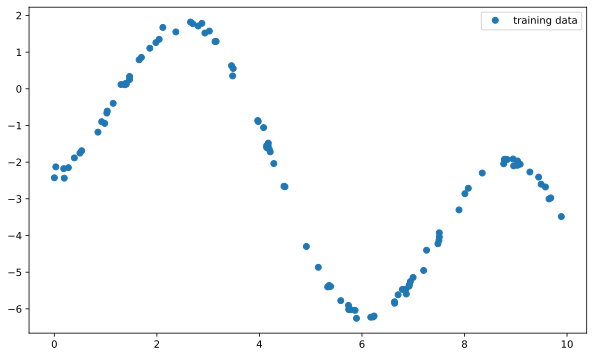

In [94]:
plt.plot(x_train,y_train,'o', label = "training data")
plt.legend()


## (b) 
Learn a model on the form 
$$
y= a + bx + c \sin(x + \phi) + \epsilon,  \qquad  \epsilon \sim \mathcal{N}(0, 0,1^2) \qquad (2.1)
$$

where all parameters $a$, $b$, $c$ and $\phi$ are to be learned from the training data `x_train` and `y_train`. Refrain from using the` linear_model()` command, but implement the normal equations yourself as in problem 2.1. Hint: Even though (2.1) is not a linear regression model, you can use the fact that $c \sin(x + \phi) = c \cos(\phi) \sin(x) + c \sin(\phi) \cos(x)$ to transform it into one.  


In [95]:
X_training = np.column_stack([np.ones(np.size(x_train)),x_train,np.sin(x_train),np.cos(x_train)])
Y_training = y_train.copy()
Y_training.T

Theta_training = np.linalg.solve(X_training.T@X_training,X_training.T@Y_training)

model.fit(X_training,Y_training)

print(Theta_training)


[ 0.421 -0.603  1.088 -2.789]


## (c) 
Construct 100 test inputs `x_test` in the span from 0 to 10 by using the `np.linspace()` function. Predict the outputs corresponding to these inputs and plot them together with the training data.

[[ 4.170e+00 -8.566e-01 -5.160e-01]
 [ 7.203e+00  7.956e-01  6.058e-01]
 [ 1.144e-03  1.144e-03  1.000e+00]
 [ 3.023e+00  1.180e-01 -9.930e-01]
 [ 1.468e+00  9.947e-01  1.031e-01]
 [ 9.234e-01  7.976e-01  6.031e-01]
 [ 1.863e+00  9.577e-01 -2.877e-01]
 [ 3.456e+00 -3.089e-01 -9.511e-01]
 [ 3.968e+00 -7.353e-01 -6.778e-01]
 [ 5.388e+00 -7.802e-01  6.255e-01]
 [ 4.192e+00 -8.676e-01 -4.973e-01]
 [ 6.852e+00  5.388e-01  8.424e-01]
 [ 2.045e+00  8.899e-01 -4.562e-01]
 [ 8.781e+00  6.001e-01 -7.999e-01]
 [ 2.739e-01  2.705e-01  9.627e-01]
 [ 6.705e+00  4.091e-01  9.125e-01]
 [ 4.173e+00 -8.580e-01 -5.136e-01]
 [ 5.587e+00 -6.414e-01  7.672e-01]
 [ 1.404e+00  9.861e-01  1.662e-01]
 [ 1.981e+00  9.170e-01 -3.988e-01]
 [ 8.007e+00  9.882e-01 -1.529e-01]
 [ 9.683e+00 -2.550e-01 -9.669e-01]
 [ 3.134e+00  7.351e-03 -1.000e+00]
 [ 6.923e+00  5.972e-01  8.021e-01]
 [ 8.764e+00  6.138e-01 -7.894e-01]
 [ 8.946e+00  4.606e-01 -8.876e-01]
 [ 8.504e-01  7.516e-01  6.597e-01]
 [ 3.905e-01  3.807e-01  9.2

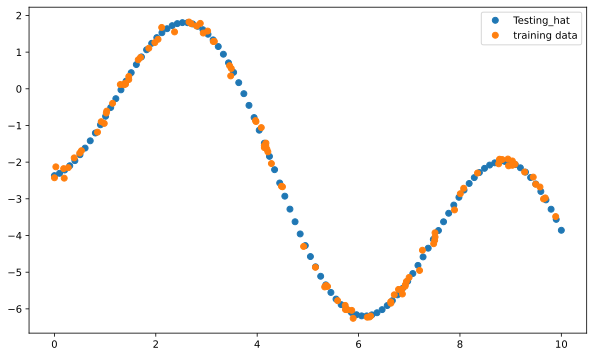

In [96]:
x_test = np.linspace(0,10,100)

X_testing = np.column_stack([np.ones(np.size(x_test)),x_test,np.sin(x_test),np.cos(x_test)])


Y_testing_hat = X_testing@Theta_training

plt.plot(x_test, Y_testing_hat, 'o', label="Testing_hat")
plt.plot(x_train,y_train,'o', label = "training data")
plt.legend()

model.fit(X_training[:,1:],Y_training)

prediction = model.predict(X_training[:,1:])

print(X_training[:,1:])

RMSE = np.mean(np.sqrt(np.square(prediction-Y_training)))

print(RMSE)


## (d) 
Do a least squares fit by instead using the `linear_model()` function in `Python`. Check that you get the same estimates as in (b).

In [97]:
#se above (c)

SyntaxError: invalid syntax (3723806837.py, line 1)

# 2.5  Regularization

In this exercise we will apply Ridge regression and Lasso for fitting a polynomial to a scalar data set. We will have a setting where we first generate synthetic training data from 
<a id=2.2></a>$$
y = x^3 + 2x^2 + 6 + \epsilon, \qquad (2.2)
$$
and later try to learn model for the data.   

## (a) <a id='2.5-a'></a>
Write a function that implements the polynomial [(2.2)](#2.2), i.e., takes $x$ as argument and returns $x^3 + 2x^2 + 6$. 

In [98]:
def generate_polynomial_value(x):
    y = x**3 +2*(x**2)+6
    return y



9


## (b) 
Use `np.random.seed()` to set the random seed. Use the function `np.linspace()` to construct a vector `x` with `n = 12` elements equally spaced from $-2.3$ to $1$. Then use your function from [(a)](#2.5-a) to construct a vector $\textbf{y} = [y_1, ..., y_n]^T$ with 12 elements, where $y = x^3 + 2x^2 + 6 + \epsilon$, with $\epsilon \sim  \mathcal{N(0, 1^2)}$. This is our training data.

In [123]:
np.random.seed(1)

a_train = np.linspace(-2.3,1,12)
a = np.linspace(-2.3,1,400)
a_train =a_train.T
b = []
b_train = []

b = generate_polynomial_value(a)
b_train = generate_polynomial_value(a_train+np.random.normal(0,1,np.size(a_train)))


b_train = np.array(b_train)

b_train = b_train.T

## (c) 
Plot the training data $\mathcal{T} = \{x_i, y_i\}_{i=1}^{12}$ together with the "true" function.

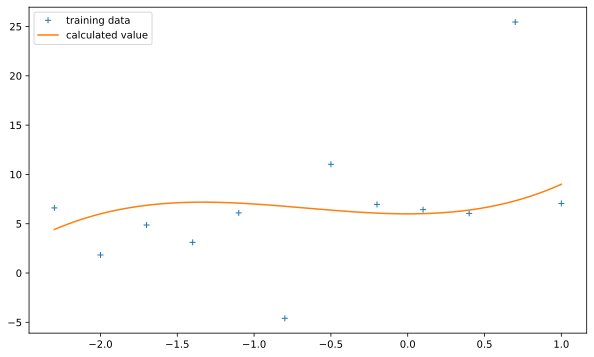

In [125]:
plt.plot(a_train,b_train,'+', label="training data")
plt.plot(a,b, label="calculated value")
plt.legend()
plt.show()


## (d)
Fit a straight line to the data with $y$ as output and $x$ as input and plot the predicted output $\hat{y}_{\star}$ for densely spaced $x_{\star}$ values between $-2.3$ and $1$. Plot these predictions in the same plot window.

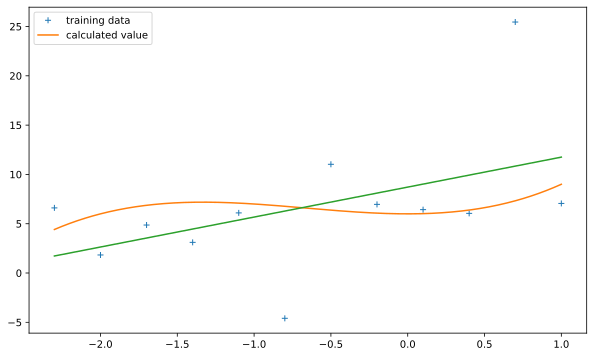

In [147]:
model =skl_lm.LinearRegression()


model.fit(a_train.reshape(-1,1),b_train)
prediction = model.predict(a.reshape(-1,1))

plt.plot(a_train,b_train,'+', label="training data")
plt.plot(a,b, label="calculated value")
plt.plot(a,prediction)
plt.legend()
plt.show()

## (e) 
Fit an 11th degree polynomial to the data with linear regression. Plot the corresponding predictions.

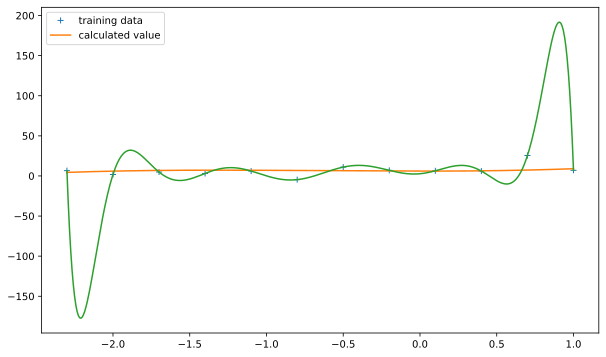

In [156]:
a_train_exp = np.power(a_train.reshape(-1,1),np.arange(np.size(a_train)))
a_exp = np.power(a.reshape(-1,1),np.arange(np.size(a_train)))


model.fit(a_train_exp,b_train)

predict_exp =model.predict(a_exp)

plt.plot(a_train,b_train,'+', label="training data")
plt.plot(a,b, label="calculated value")
plt.plot(a,predict_exp)
plt.legend()
plt.show()

## (f) 

Use the fucntion `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso` to fit a 11th degree polynomial. Also inspect the estimated coefficients. Try different values of penalty term $\alpha$. What do you observe?


Model coefficients:
α =0
[    0.       17.882   219.67   -146.207 -1544.409  -488.711  2897.301
  2512.855  -803.554 -1783.783  -768.181  -108.548]
α =1
[ 0.     5.418  1.367  2.189  0.124 -0.454 -0.811 -1.515 -1.566 -2.225
 -1.479 -0.309]
α =10
[ 0.     1.454 -0.105  0.751 -0.193  0.2   -0.08  -0.226  0.035 -0.293
 -0.322 -0.078]
α =100
[ 0.     0.213 -0.037  0.145 -0.063  0.098 -0.06   0.05  -0.022 -0.016
  0.019  0.006]
α =1000
[ 0.     0.025 -0.007  0.021 -0.013  0.02  -0.018  0.021 -0.018  0.012
 -0.002 -0.006]


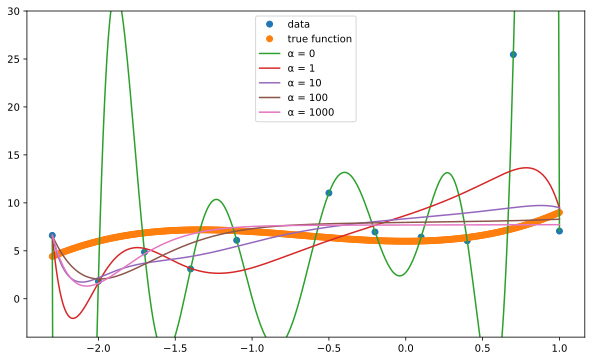

Model coefficients:
α =0.001
[ 0.000e+00  1.305e+01  4.680e+00 -7.909e+00 -5.390e+00 -1.372e+00
 -5.245e-01 -7.947e-02 -1.882e-02 -8.114e-03  1.655e-03 -1.453e-03]
α =0.1
[ 0.000e+00  9.508e+00  0.000e+00 -5.148e+00 -9.301e-01 -1.279e-01
 -4.282e-01 -3.116e-02 -1.519e-02 -7.432e-03  2.219e-03 -1.777e-03]
α =1
[ 0.000e+00  2.513e+00 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00  0.000e+00 -1.930e-02  1.204e-04  1.369e-03 -1.448e-03]
α =10
[ 0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.046  0.006
 -0.    -0.005]


C:\Users\Felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.521e+02, tolerance: 5.392e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e+02, tolerance: 5.392e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

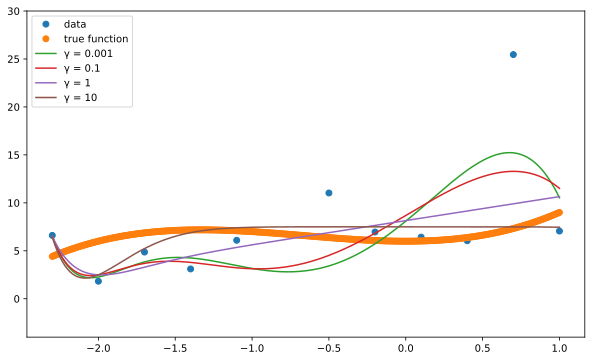

In [164]:
plt.plot(a_train,b_train, 'o', label="data")
plt.plot(a,b, 'o', label="true function")
print("Model coefficients:")

for alpha in [0,1,10,100,1000]:
    model = skl_lm.Ridge(alpha=alpha)
    model.fit(a_train_exp,b_train)
    print(f'\u03b1 ={alpha}')
    print(model.coef_)

    prediction = model.predict(a_exp)
    plt.plot(a,prediction, label=f"\u03b1 = {alpha}")

plt.ylim([-4,30])
plt.legend()
plt.show()















plt.plot(a_train,b_train, 'o', label="data")
plt.plot(a,b, 'o', label="true function")
print("Model coefficients:")

for gamma in [0.001,0.1,1,10]:
    model = skl_lm.Lasso(alpha=gamma)
    model.fit(a_train_exp,b_train)
    print(f'\u03b1 ={gamma}')
    print(model.coef_)

    prediction = model.predict(a_exp)
    plt.plot(a,prediction, label=f"\u03b3 = {gamma}")

plt.ylim([-4,30])
plt.legend()
plt.show()